# Анализ и прогнозирование временного ряда.

Цель лабораторной работы: изучение основных методов анализа и прогнозирование временных рядов.


    1) Выберите набор данных (датасет) для решения задачи прогнозирования временного ряда.
    2) Визуализируйте временной ряд и его основные характеристики.
    3) Разделите временной ряд на обучающую и тестовую выборку.
    4) Произведите прогнозирование временного ряда с использованием как минимум двух методов.
    5) Визуализируйте тестовую выборку и каждый из прогнозов.
    6) Оцените качество прогноза в каждом случае с помощью метрик.


## 1) Выберите набор данных (датасет) для решения задачи прогнозирования временного ряда.

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score

from datetime import date


import statsmodels.api as sm




from matplotlib import pyplot
import matplotlib.pyplot as plt

# скроем предупреждения о возможных ошибках для лучшей читаемости
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./DailyDelhiClimateTrain.csv')

In [3]:
df.shape

(1462, 5)

In [4]:
df.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

In [5]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [6]:
selected_columns = df[["date","meantemp"]]

new_df = selected_columns.copy()

print(new_df)

            date   meantemp
0     2013-01-01  10.000000
1     2013-01-02   7.400000
2     2013-01-03   7.166667
3     2013-01-04   8.666667
4     2013-01-05   6.000000
...          ...        ...
1457  2016-12-28  17.217391
1458  2016-12-29  15.238095
1459  2016-12-30  14.095238
1460  2016-12-31  15.052632
1461  2017-01-01  10.000000

[1462 rows x 2 columns]


In [7]:
df = new_df[df['meantemp'].notna()]

In [11]:
print(df)

            date   meantemp
0     2013-01-01  10.000000
1     2013-01-02   7.400000
2     2013-01-03   7.166667
3     2013-01-04   8.666667
4     2013-01-05   6.000000
...          ...        ...
1457  2016-12-28  17.217391
1458  2016-12-29  15.238095
1459  2016-12-30  14.095238
1460  2016-12-31  15.052632
1461  2017-01-01  10.000000

[1462 rows x 2 columns]


In [12]:
df.isnull().sum()

date        0
meantemp    0
dtype: int64

## 2) Визуализируйте временной ряд и его основные характеристики.

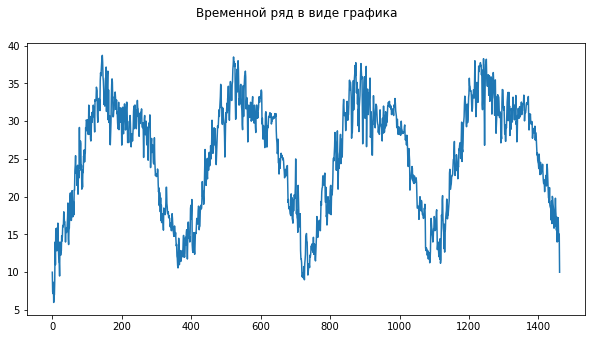

In [15]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд в виде графика')
df.plot(ax=ax, legend=False)
pyplot.show()

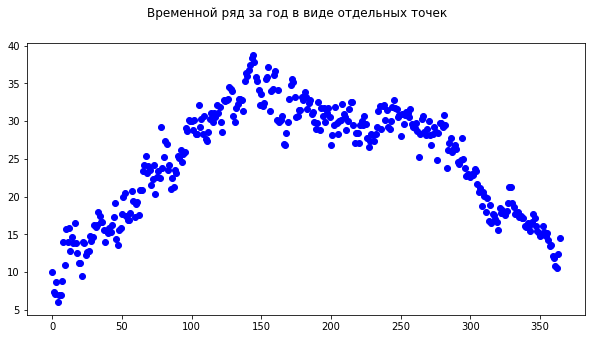

In [23]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд за год в виде отдельных точек')
# df.plot(ax=ax, legend=False, style='bo')
df[:365].plot(ax=ax, legend=False, style='bo')
pyplot.show()

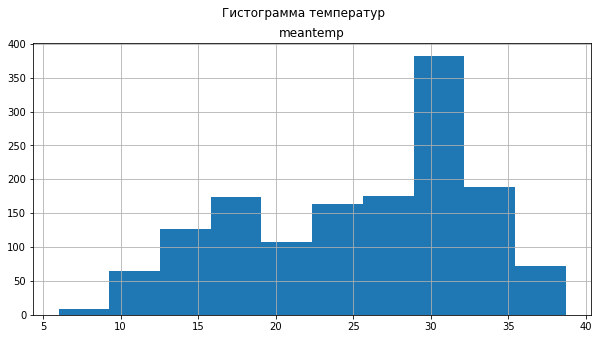

In [24]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Гистограмма температур')
df.hist(ax=ax, legend=False)
pyplot.show()

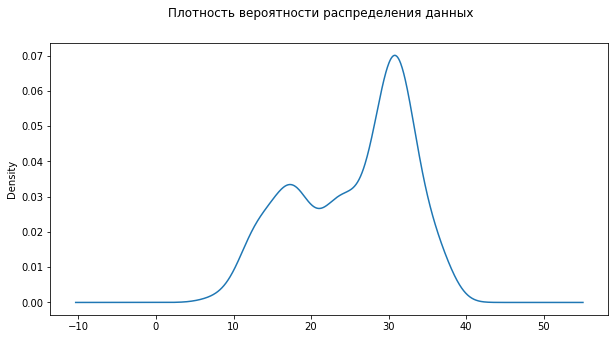

In [25]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Плотность вероятности распределения данных')
df.plot(ax=ax, kind='kde', legend=False)
pyplot.show()

In [26]:
df.shape

(1462, 2)

In [29]:
df_meantemp = df[["meantemp"]]

df_meantemp = df_meantemp.copy()

df_meantemp.shape

(1462, 1)


#### Lag Plots

Диаграмма позволяет понять автокорреляцию в данных временного ряда. Может рассматриваться (хотя это весьма грубое сравнение) как аналог корреляционной матрицы для временного ряда.
По оси абсцисс откладывается значение временного ряда.
По оси ординат для каждой точки откладывается ее лаг порядка i, где i - параметр, задаваемый пользователем.

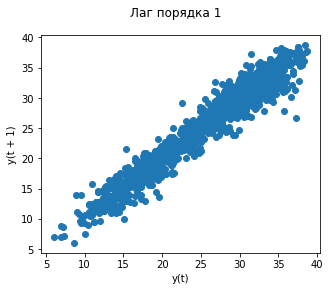

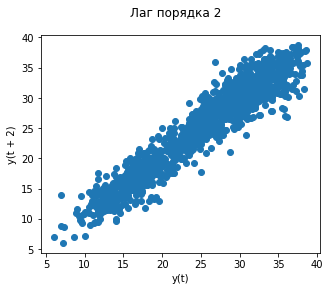

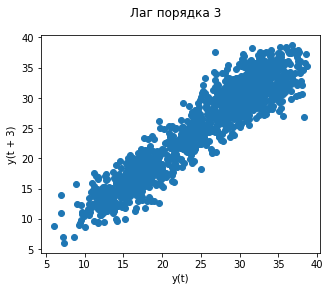

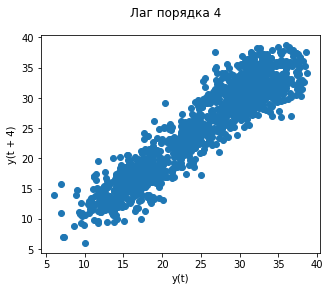

In [30]:
for i in range(1, 5):
    fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(5,4))
    fig.suptitle(f'Лаг порядка {i}')
    pd.plotting.lag_plot(df_meantemp, lag=i, ax=ax)
    pyplot.show()

Если облако точек направлено из левого нижнего угла в правый верхний, то имеет место положительная автокорреляция.

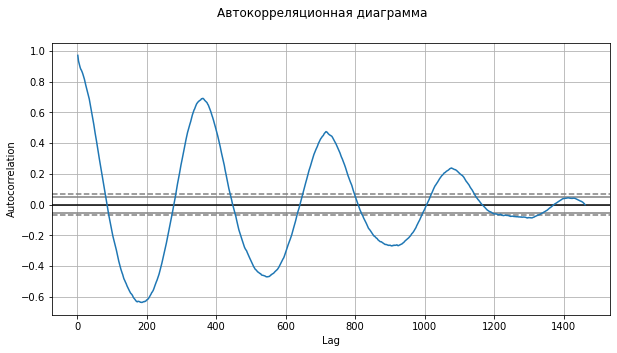

In [31]:
# По оси Y откладывается ковариация 
# https://stats.stackexchange.com/questions/357300/what-does-pandas-autocorrelation-graph-show

fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Автокорреляционная диаграмма')
pd.plotting.autocorrelation_plot(df_meantemp, ax=ax)
pyplot.show()


#### Автокорреляционная функция

Показывает зависимость коэффициента корреляции от лага, то есть корреляцию между исходным временным рядом и временным рядом,сдвинутым на заданный лаг.


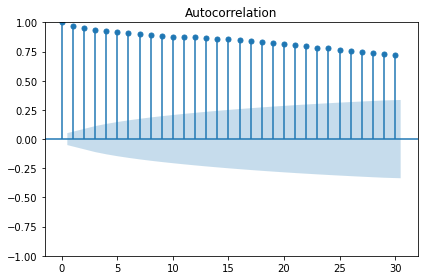

In [32]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_meantemp, lags=30)
plt.tight_layout()

#### Частичная автокорреляционная функция

Находит корреляцию остатков, которые остается после удаления эффектов, объясняемых более ранними лагами.

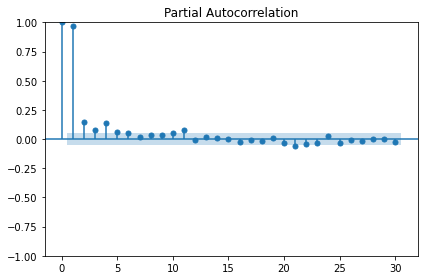

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_meantemp, lags=30)
plt.tight_layout()

#### Декомпозиция временного ряда с помощью библиотеки statsmodels

In [34]:
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
from statsmodels.tsa.seasonal import seasonal_decompose
# Аддитивная модель
def plot_decompose(data=df['meantemp'], model='add'):
    result_add = seasonal_decompose(data, model = 'add', period = 1)
    fig = result_add.plot()
    fig.set_size_inches((10, 8))
    # Перерисовка
    fig.tight_layout()
    plt.show()

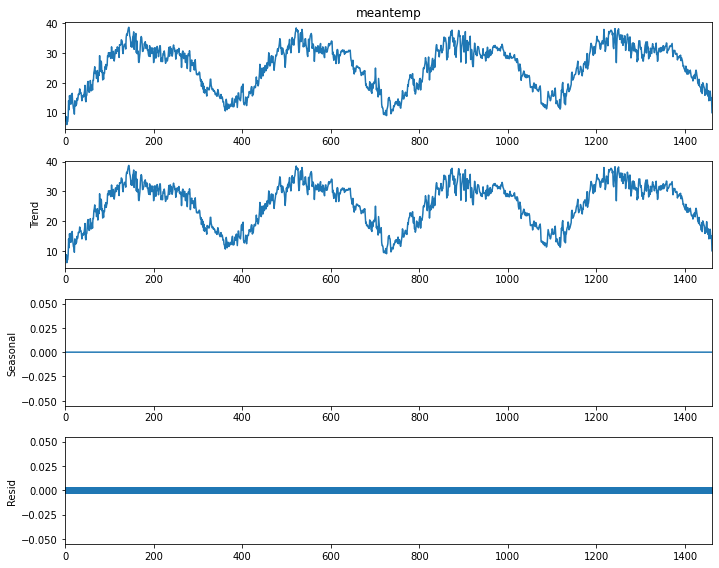

In [37]:
plot_decompose(data=new_df['meantemp'], model='add')

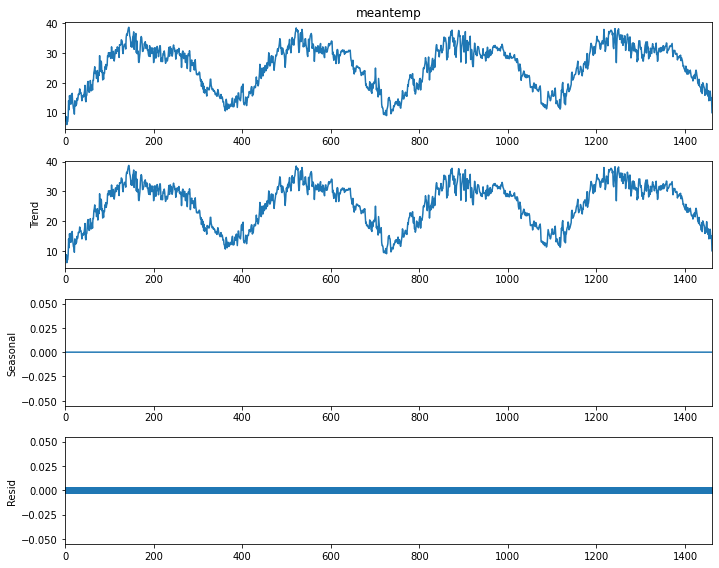

In [22]:
plot_decompose(data=df['meantemp'], model='mul')


## Скользящая средняя


Показывает среднее значение ряда, но не является алгоритмом предсказания.



In [38]:
ts_fb2 = df.copy()

In [40]:
# Простое скользящее среднее (SMA)
ts_fb2['SMA_10'] = ts_fb2['meantemp'].rolling(10, min_periods=1).mean()
ts_fb2['SMA_20'] = ts_fb2['meantemp'].rolling(20, min_periods=1).mean()

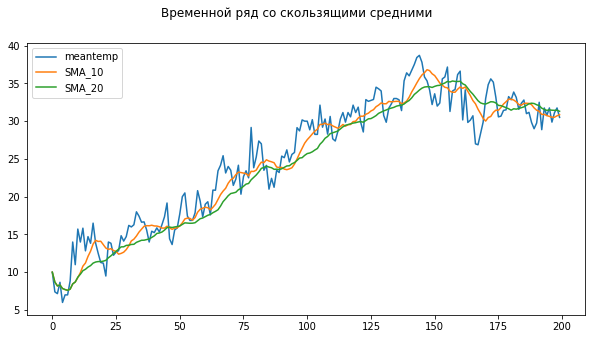

In [41]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд со скользящими средними')
ts_fb2[:200].plot(ax=ax, legend=True)
pyplot.show()

## Прогнозирование временного ряда авторегрессионными методами¶



Методы прогнозирования

        1) Модель ARMA
        2) Модель ARIMA
        3) Модель Хольта-Винтера

Реализация методов прогнозирования

        1) Статья с примерами прогнозирования на Python
        2) Подбор гиперпараметров для модели ARIMA


In [42]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [43]:


# Целочисленная метка шкалы времени 
xnum = list(range(ts_fb2.shape[0]))
# Разделение выборки на обучающую и тестовую
Y = ts_fb2['meantemp'].values
train_size = int(len(Y) * 0.7)
xnum_train, xnum_test = xnum[0:train_size], xnum[train_size:]
train, test = Y[0:train_size], Y[train_size:]
history_arima = [x for x in train]
history_es = [x for x in train]



In [44]:
# Параметры модели (p,d,q) 
arima_order = (6,1,0)
# Формирование предсказаний
predictions_arima = list()
for t in range(len(test)):
    model_arima = ARIMA(history_arima, order=arima_order)
    model_arima_fit = model_arima.fit()
    yhat_arima = model_arima_fit.forecast()[0]
    predictions_arima.append(yhat_arima)
    history_arima.append(test[t])
# Вычисление метрики RMSE
error_arima = mean_squared_error(test, predictions_arima, squared=False)

In [45]:
# Формирование предсказаний
predictions_es = list()
for t in range(len(test)):
    model_es = ExponentialSmoothing(history_es)
    model_es_fit = model_es.fit()
    yhat_es = model_es_fit.forecast()[0]
    predictions_es.append(yhat_es)
    history_es.append(test[t])
# Вычисление метрики RMSE
error_es = mean_squared_error(test, predictions_es, squared=False)

In [46]:
# Ошибка прогноза
np.mean(Y), error_arima, error_es

(25.495520655761762, 1.5397416375065742, 1.5775289707968125)

In [47]:
# Записываем предсказания в DataFrame
ts_fb2['predictions_ARIMA'] = (train_size * [np.NAN]) + list(predictions_arima)
ts_fb2['predictions_HWES'] = (train_size * [np.NAN]) + list(predictions_es)

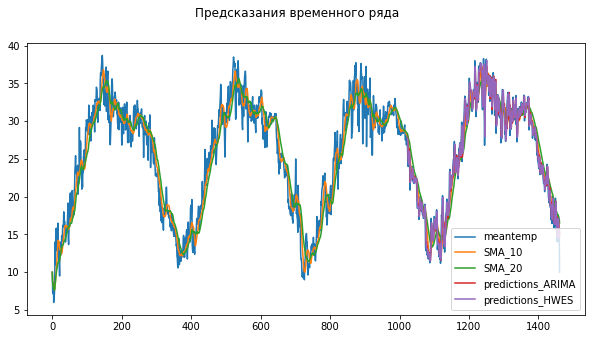

In [48]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда')
ts_fb2.plot(ax=ax, legend=True)
pyplot.show()

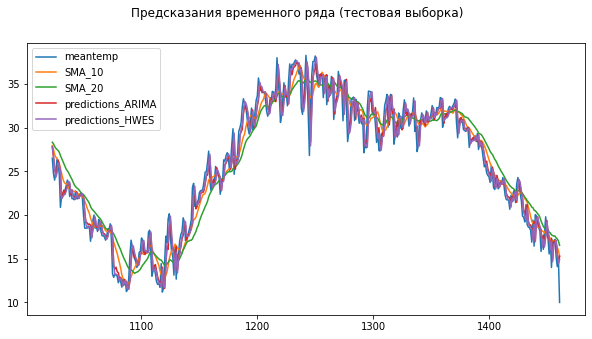

In [49]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
ts_fb2[train_size:].plot(ax=ax, legend=True)
pyplot.show()

Вывод. Предсказания ARIMA и HWES близки к скользящему среднему.

## Прогнозирование временного ряда методом символьной регресии

In [51]:
from gplearn.genetic import SymbolicRegressor

In [60]:
function_set = ['add', 'sub', 'mul', 'div', 'sin']
est_gp = SymbolicRegressor(population_size=500, metric='mse',
                               generations=70, stopping_criteria=0.01,
                               init_depth=(4, 10), verbose=1, function_set=function_set,
                               const_range=(-100, 100), random_state=0)

In [61]:
est_gp.fit(np.array(xnum_train).reshape(-1, 1), train.reshape(-1, 1))

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0   263.65       2.3592e+68      766          649.073              N/A      2.58m
   1   151.96      1.33697e+15       40          434.693              N/A      1.21m
   2   411.36      5.41212e+12       45          69.6112              N/A      2.24m
   3   166.69      1.62705e+18       47          60.6742              N/A      1.22m
   4   179.54      8.69019e+15       43           56.623              N/A      1.11m
   5    70.45      9.08907e+27       43          53.1611              N/A     38.54s
   6    75.93       1.9982e+17       40           52.602              N/A     38.19s
   7    50.21      2.26345e+17       42          49.5778              N/A     29.57s
   8    48.30       1.1502e+20       46          48.9997              N/A  

SymbolicRegressor(const_range=(-100, 100),
                  function_set=['add', 'sub', 'mul', 'div', 'sin'],
                  generations=70, init_depth=(4, 10), metric='mse',
                  population_size=500, random_state=0, stopping_criteria=0.01,
                  verbose=1)

In [62]:
print(est_gp._program)

mul(div(sub(add(X0, X0), -13.981), sub(mul(X0, X0), mul(div(7.961, X0), mul(X0, -98.235)))), sub(sub(mul(div(sub(add(X0, X0), div(-13.981, mul(div(-13.981, -98.235), mul(X0, -97.427)))), sub(X0, mul(mul(X0, add(X0, X0)), mul(div(-13.981, -98.235), mul(X0, -97.427))))), sub(sub(sub(mul(-97.427, mul(X0, -98.235)), -13.981), div(7.961, X0)), div(7.961, X0))), mul(div(-13.981, -98.235), mul(X0, -97.427))), X0))


In [63]:
# Предсказания
y_gp = est_gp.predict(np.array(xnum_test).reshape(-1, 1))
y_gp[:10]

array([25.8898287 , 25.88969226, 25.88955604, 25.88942006, 25.88928431,
       25.88914879, 25.88901349, 25.88887843, 25.88874359, 25.88860898])

In [64]:
# Записываем предсказания в DataFrame
ts_fb2['predictions_GPLEARN'] = (train_size * [np.NAN]) + list(y_gp)

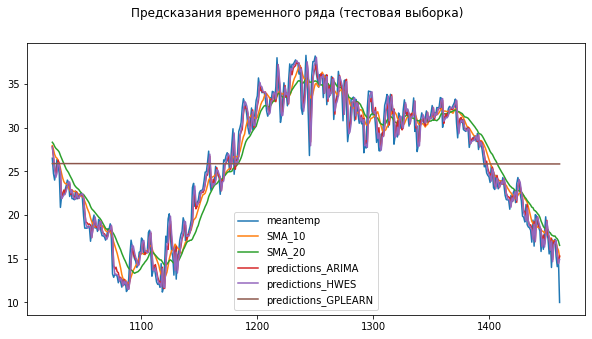

In [65]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
ts_fb2[train_size:].plot(ax=ax, legend=True)
pyplot.show()